> Load Libraries
We start by importing the core libraries for data analysis and visualization. Pandas will be used for handling data, Numpy will be used for calculation methods, and Matplotlib/Seaborn will support charting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

Load cleaned data.

In [3]:
df = pd.read_csv('../data/clean_seattle_stlouis_weather.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

Plot the daily precipitation for both cities on the same graph

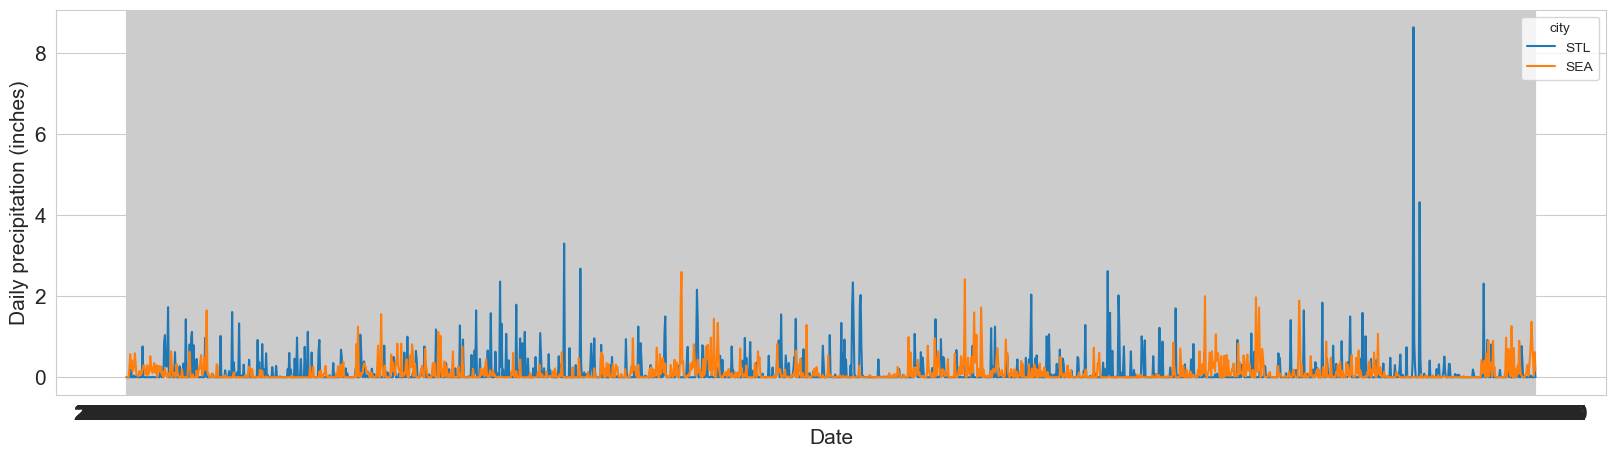

In [5]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The plot show how much rain in each cities from begining of 2018 until end of 2022

Compute basic numerical summaries for precipitation in each city

In [6]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
             count      mean       std  min  25%   50%   75%   max
city                                                              
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60
STL         1826.0  0.130345  0.392268  0.0  0.0  0.00  0.05  8.64

We then have the overall summaries information on the precipitation.
Compare mean precipitation values averaged over all days

In [7]:
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
SEA,0.113270
STL,0.130345


From the mean, we can see that Seattle has lower value than other cities. Show the values as a bar graph

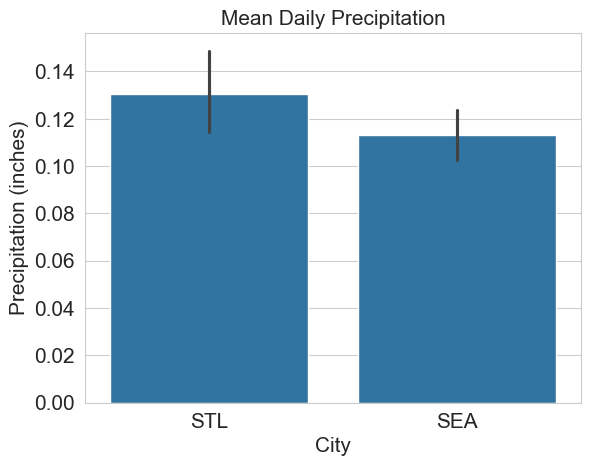

In [8]:
sns.barplot(data=df, x='city', y='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The graph show more visualize how other cities has higher mean than Seattle with the error bar. Add a column to the data frame with the number of the month

In [9]:
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.0,1,1
1,2018-01-02,STL,0.0,2,1
2,2018-01-03,STL,0.0,3,1
3,2018-01-04,STL,0.0,4,1
4,2018-01-05,STL,0.0,5,1


In [10]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

Now we have extract the month for each records for more visualization. Plot the distribution of precipitation amounts each month using boxplots

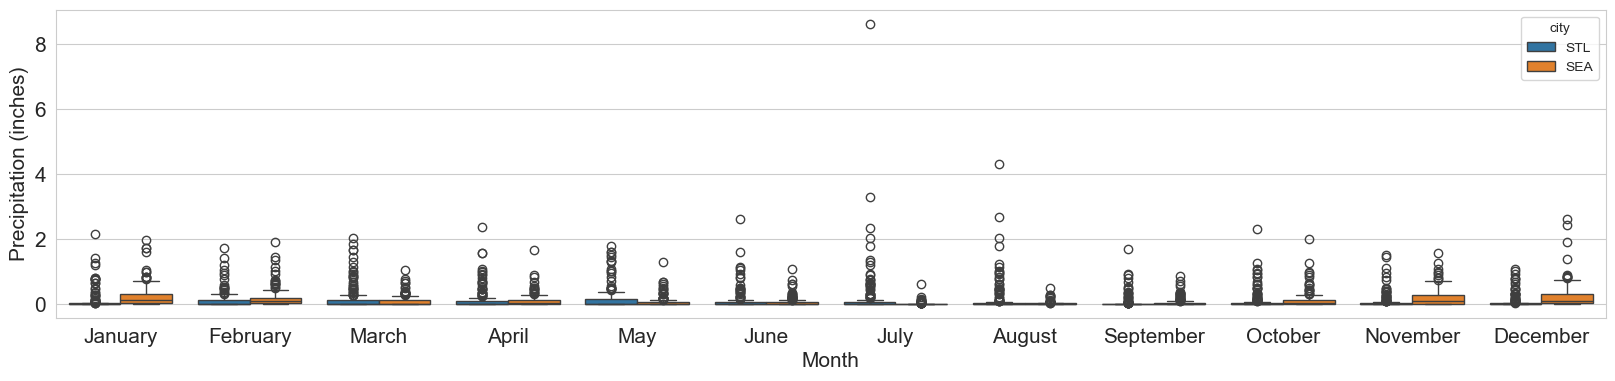

In [11]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

#get month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) # Get month names
plt.xticks(ticks=range(12), labels=month_names) # Set x-axis ticks to month names

plt.show()

Orient the plot horizontally for easier visual

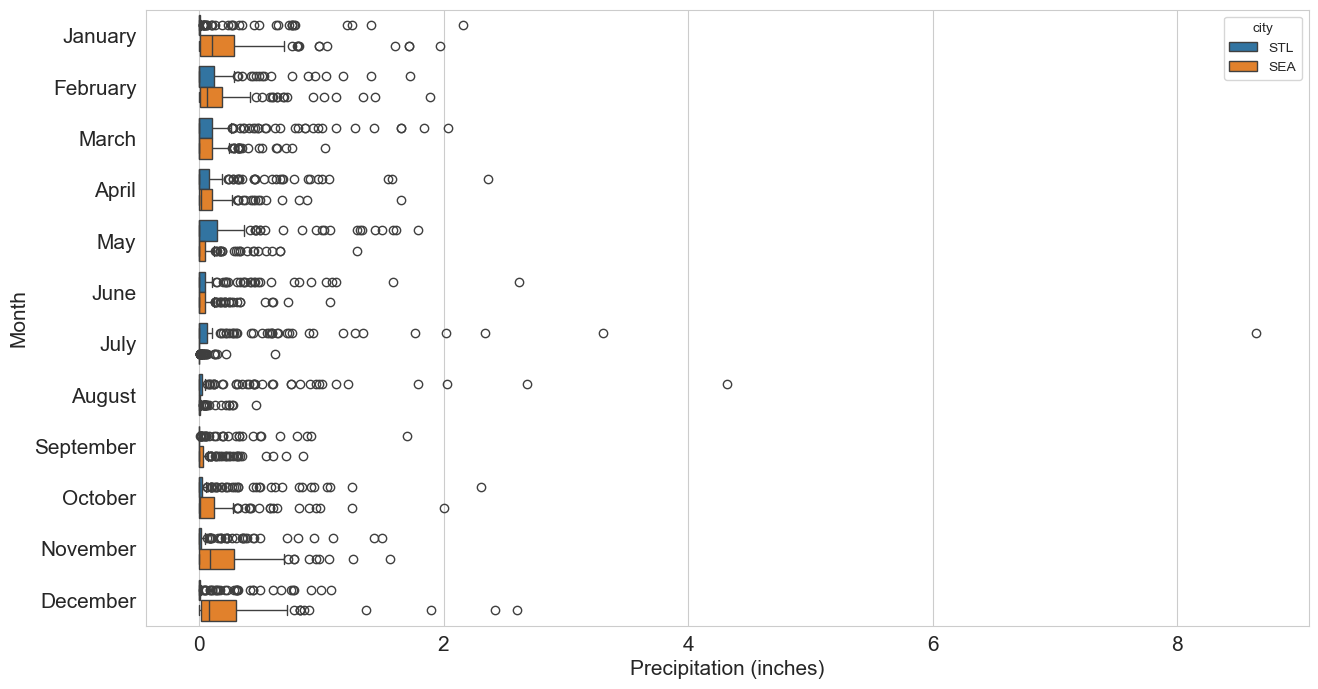

In [12]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Month', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

Zoom in on the precipiation axis

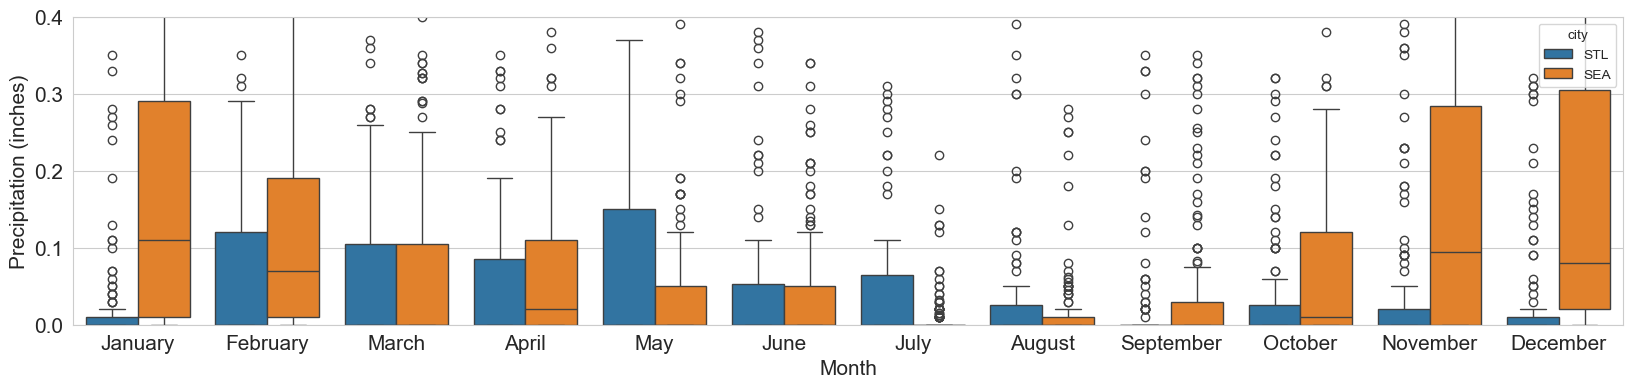

In [13]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, 0.4)

plt.show()

Plot the mean precipitation each month

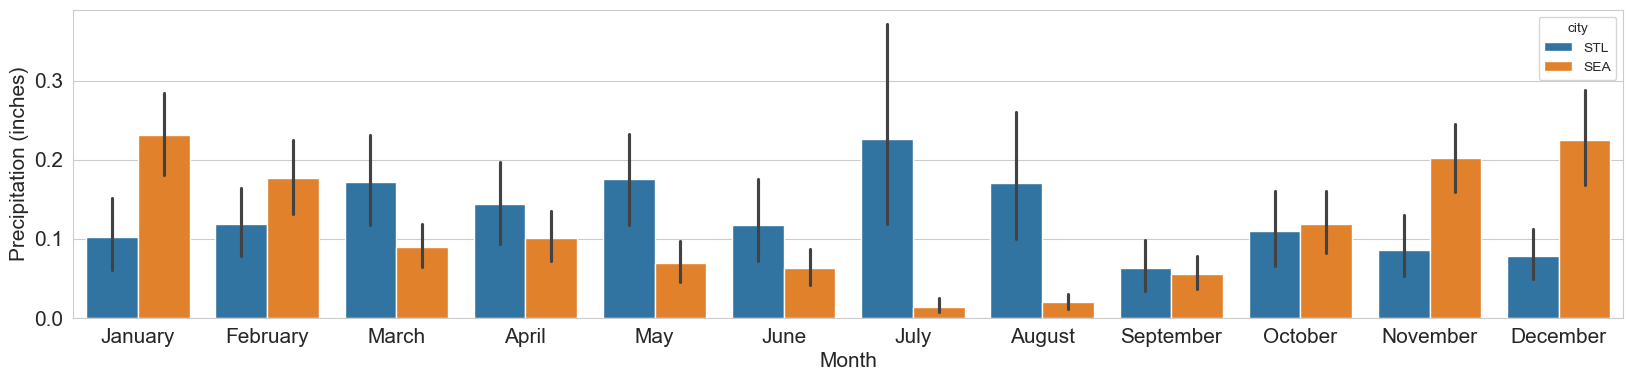

In [14]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

Compute the mean precipitation each month

In [15]:
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903
STL  1           0.102065
     2           0.118298
     3           0.171355
     4           0.143733
     5           0.174839
     6           0.117200
     7           0.225419
     8           0.169871
     9           0.062333
     10          0.109677
     11          0.086267
     12          0.078387

Plot the proportion of days with any precipitation

In [16]:
df['any_precipitation'] = df['precipitation'] > 0
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,STL,0.0,1,1,False
1,2018-01-02,STL,0.0,2,1,False
2,2018-01-03,STL,0.0,3,1,False
3,2018-01-04,STL,0.0,4,1,False
4,2018-01-05,STL,0.0,5,1,False


Plot the proportion of days with any precipitation over the 5 years

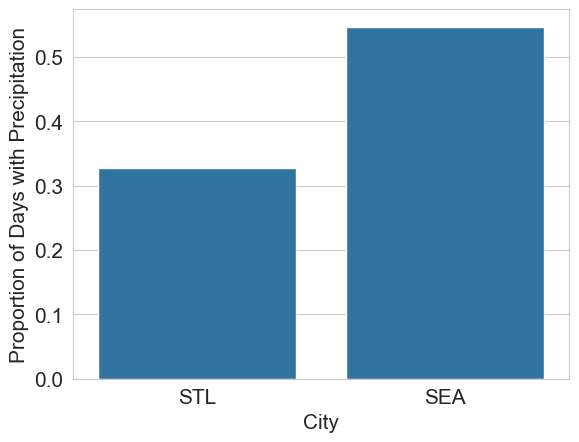

In [17]:
sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion of Days with Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

Plot the proportion of days with precipitation each month

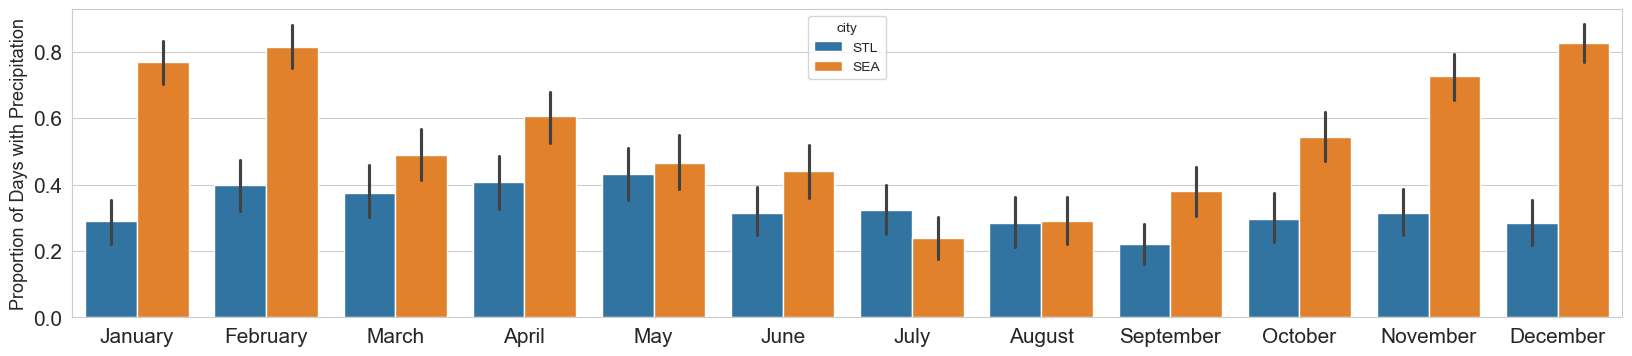

In [18]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion of Days with Precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

plt.show()

perform a statistical test for differences in the mean precipitation each month between the cities

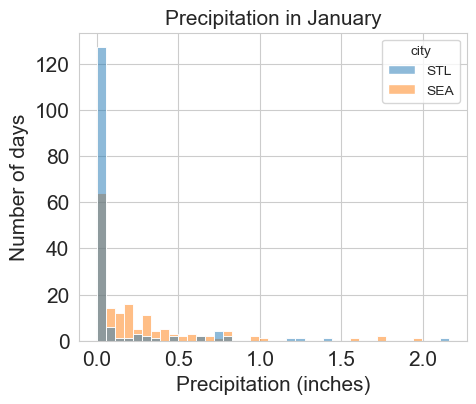

In [19]:
plt.figure(figsize=(5,4))

sns.histplot(data=df.loc[df['month'] == 1], x='precipitation', hue='city')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Number of days', fontsize=15)
plt.title('Precipitation in January', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

In [20]:
from scipy import stats

In [21]:
significance_level = 0.05
significantly_different = np.zeros(12)

for month in range(1, 13):
  sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
  stl_data = df.loc[(df['city'] == 'STL') & (df['month'] == month), 'precipitation']
  
  t_statistic, p_value = stats.ttest_ind(sea_data, stl_data, equal_var=False)
  
  if p_value < significance_level:
    significantly_different[month-1] = 1
    
  print(f"Month {month}:")
  print(f"  t-statistic = {t_statistic:.2f}")
  print(f"  p-value t test = {p_value:.3f}")
  print("-" * 20)

Month 1:
  t-statistic = 3.54
  p-value t test = 0.000
--------------------
Month 2:
  t-statistic = 1.71
  p-value t test = 0.089
--------------------
Month 3:
  t-statistic = -2.45
  p-value t test = 0.015
--------------------
Month 4:
  t-statistic = -1.35
  p-value t test = 0.179
--------------------
Month 5:
  t-statistic = -3.23
  p-value t test = 0.001
--------------------
Month 6:
  t-statistic = -1.86
  p-value t test = 0.064
--------------------
Month 7:
  t-statistic = -3.22
  p-value t test = 0.002
--------------------
Month 8:
  t-statistic = -3.65
  p-value t test = 0.000
--------------------
Month 9:
  t-statistic = -0.33
  p-value t test = 0.739
--------------------
Month 10:
  t-statistic = 0.28
  p-value t test = 0.781
--------------------
Month 11:
  t-statistic = 3.89
  p-value t test = 0.000
--------------------
Month 12:
  t-statistic = 4.25
  p-value t test = 0.000
--------------------


Plot the mean precipitation each month with a star for significant differences

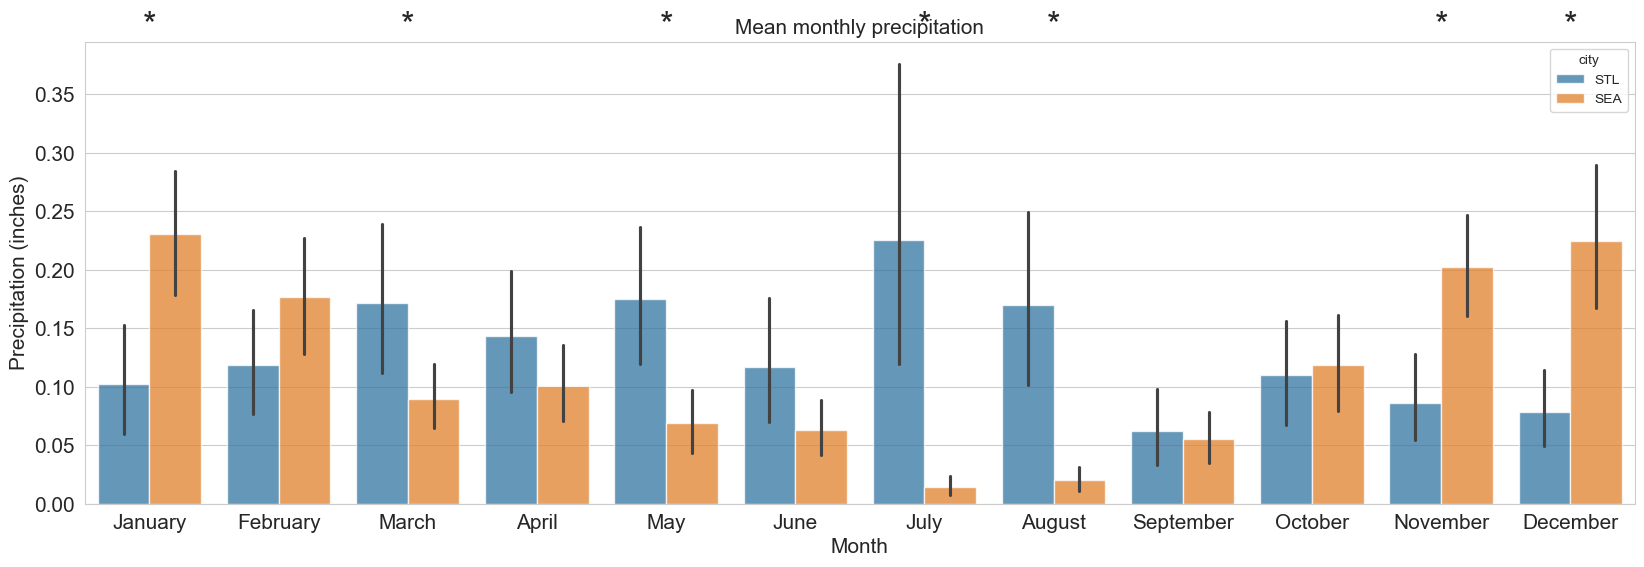

In [22]:
plt.figure(figsize=(20, 6))

sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
  if significantly_different[month] == 1:
    plt.text(month, 0.4, '*', ha='center', fontsize=25)
    
plt.show()

Perform a statistical test for differences in the proportion of days with any precipitaion each month between the cities

In [23]:
from statsmodels.stats.proportion import proportions_ztest

In [24]:
significantly_different_proportion = np.zeros(12)

for month in range(1, 13):
  contingency_table = pd.crosstab(
    df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation']
  )
  
  days_with_precipitation = contingency_table[True]
  
  total_counts = contingency_table.sum(axis=1)
  
  zstat, p_value = proportions_ztest(
    count=days_with_precipitation, nobs=total_counts, alternative='two-sided'
  )
  
  if p_value < significance_level:
    significantly_different_proportion[month - 1] = 1
    
  print(f"Month {month}:")
  print(f"  z-statistic = {zstat:.2f}")
  print(f"  p-value t test = {p_value:.3f}")
  print("-" * 20)

Month 1:
  z-statistic = 8.42
  p-value t test = 0.000
--------------------
Month 2:
  z-statistic = 7.19
  p-value t test = 0.000
--------------------
Month 3:
  z-statistic = 2.06
  p-value t test = 0.039
--------------------
Month 4:
  z-statistic = 3.46
  p-value t test = 0.001
--------------------
Month 5:
  z-statistic = 0.57
  p-value t test = 0.568
--------------------
Month 6:
  z-statistic = 2.26
  p-value t test = 0.024
--------------------
Month 7:
  z-statistic = -1.64
  p-value t test = 0.100
--------------------
Month 8:
  z-statistic = 0.13
  p-value t test = 0.900
--------------------
Month 9:
  z-statistic = 3.02
  p-value t test = 0.002
--------------------
Month 10:
  z-statistic = 4.37
  p-value t test = 0.000
--------------------
Month 11:
  z-statistic = 7.16
  p-value t test = 0.000
--------------------
Month 12:
  z-statistic = 9.60
  p-value t test = 0.000
--------------------


Plot the proportion of days with any precipitation each month with a star fr significant diffences

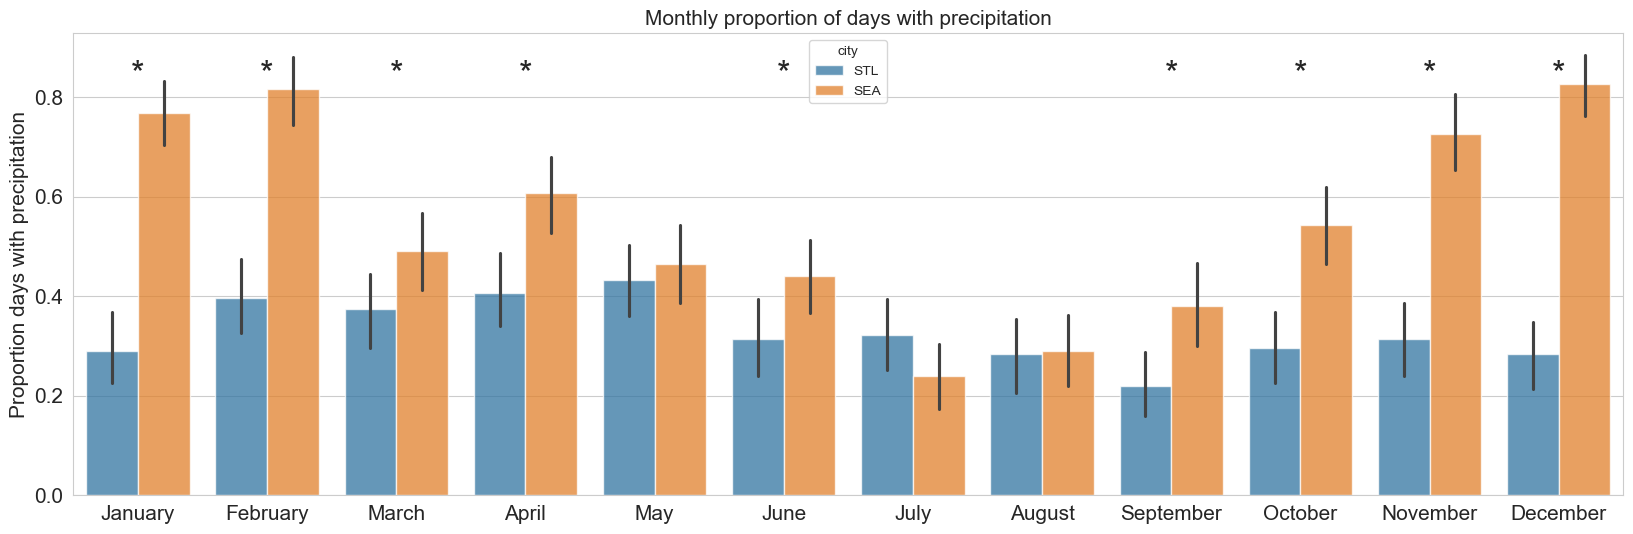

In [25]:
plt.figure(figsize=(20, 6))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=15)
plt.title('Monthly proportion of days with precipitation', fontsize=15)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
  if significantly_different_proportion[month] == 1:
    plt.text(month, 0.825, '*', ha='center', fontsize=25)
    
plt.show()